# Exercise 7: K-means Clustering and Principal Component Analysis

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set()

## ================
## K-means Clustering
## ================
### Part 1: Find Closest Centroids

In [2]:
data = sio.loadmat('ex7data2.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
X = data['X']
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [4]:
def findClosestCentroids(X, centroids):
    '''Computes the centroid memberships for every example'''
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0], 1), dtype=int)
    for i in range(X.shape[0]):
        idx[i] = 0
        for j in range(1, K):
            if ((X[i, :] - centroids[j,: ])**2).sum() < \
            ((X[i, :] - centroids[idx[i], :])**2).sum():
                idx[i] = j
    return idx.flatten()

In [5]:
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples:\n', idx[:3])

Closest centroids for the first 3 examples:
 [0 2 1]


### Part 2: Compute Means

In [6]:
def computeCentroids(X, idx, K):
    '''Returns the new centroids by computing the means of the 
       data points assigned to each centroid.'''
    m, n = X.shape
    centroids = np.zeros((K, n))
    X_new = np.c_[X, idx]
    for k in range(K):
        centroids[k, :] = np.mean(X_new[X_new[:, n] == k, :n], axis=0) 
    return centroids

In [7]:
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids:\n\n', centroids)

Centroids computed after initial finding of closest centroids:

 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


### Part 3: K-Means Clustering

In [8]:
data = sio.loadmat('ex7data2.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [9]:
X = data['X']
K = 3
max_iters = 10
initial_centroids = [[3, 3], [6, 2], [8, 5]]

In [10]:
def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
    '''Runs the K-Means algorithm on data matrix X, where each row of X
       is a single example. Combined with plotting feature'''
    initial_centroids = np.array(initial_centroids)
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros((m, 1))

    if plot_progress:
        previous_centroids = centroids
        palette = sns.color_palette('hls', K+1)
        plt.figure()
        plt.plot(centroids[:, 0], centroids[:, 1], '*k', markersize=11)
  
    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)
        
        if plot_progress:
            colors = [palette[p] for p in idx]
            plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=.8)
        
        
        centroids = computeCentroids(X, idx, K)
        
        if plot_progress:
            plt.plot(centroids[:, 0], centroids[:, 1], '*k', markersize=11)
            plt.plot([previous_centroids[:, 0], centroids[:, 0]],
                     [previous_centroids[:, 1], centroids[:, 1]], 
                     '--k', linewidth=1)
            plt.title('Iteration number: {}'.format(i+1), fontsize=16)
            previous_centroids = centroids
        
    return centroids, idx

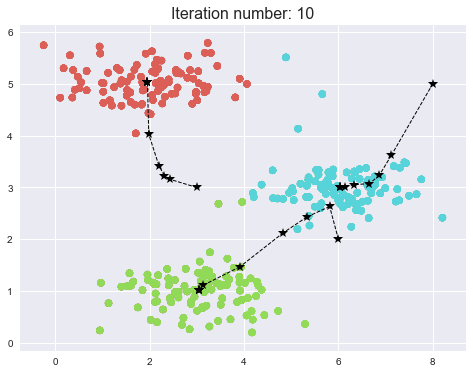

In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

centroids, idx = runkMeans(X, initial_centroids, max_iters, True)

### Part 4: K-Means Clustering on Pixels

In [12]:
data = sio.loadmat('bird_small.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [13]:
A = data['A']
A =  A/255
img_size = A.shape
X = A.reshape(img_size[0] * img_size[1], 3)

K = 16
max_iters = 10

In [14]:
def kMeansInitCentroids(X, K):
    '''Initializes K centroids that are to be used in K-Means on the dataset X'''
    import random
    idx = np.arange(len(X))
    random.shuffle(idx)
    return X[idx[:K], :]

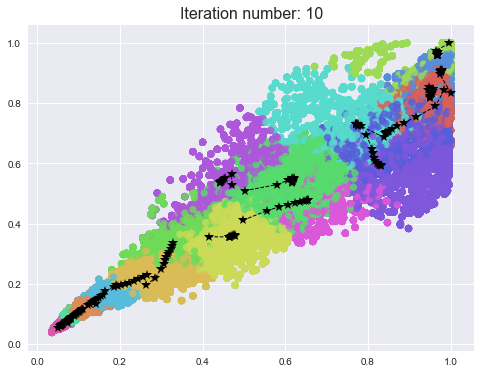

In [15]:
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)

### Image Compression

In [16]:
idx = findClosestCentroids(X, centroids)

In [17]:
X_recovered = centroids[idx, :].reshape(img_size[0], img_size[1], 3)

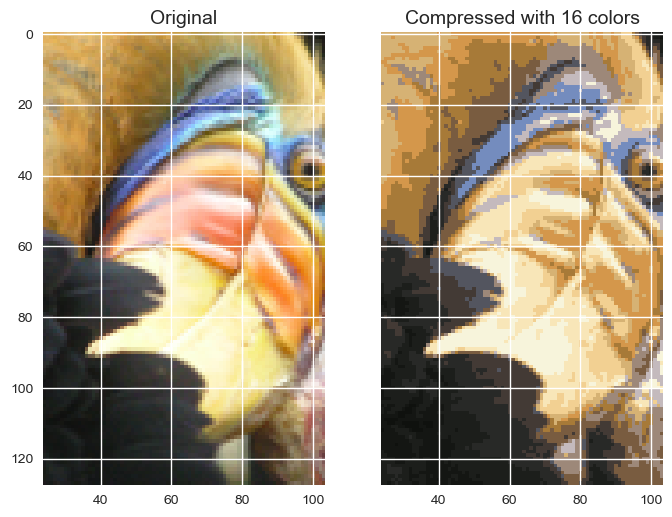

In [18]:
fig, [ax1, ax2] = plt.subplots(1, 2, sharey=True, dpi=100)
ax1.imshow(A)
ax1.set_title('Original', fontsize=14)
ax2.imshow(X_recovered)
ax2.set_title('Compressed with 16 colors', fontsize=14)
plt.show()

## ========================
## Principal Component Analysis
## ========================
### Part 1: Load Example Dataset

In [19]:
data = sio.loadmat('ex7data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

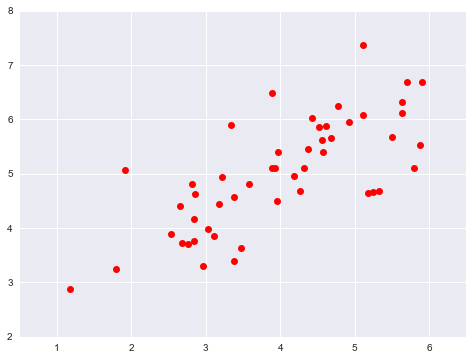

In [20]:
X = data['X']
plt.figure()
plt.plot(X[:, 0], X[:, 1], 'ro')
plt.axis([.5, 6.5, 2, 8])
plt.show()

### Part 2: Principal Component Analysis

In [21]:
def featureNormalize(X):
    '''Normalizes the features in X'''
    mu = np.mean(X, axis=0)
    sigma = np.std(X, ddof=1, axis=0)
    return (X - mu) / sigma, mu, sigma

def pca(X):
    '''Run principal component analysis on the dataset X'''
    Sigma = (X.T @ X) / len(X)
    U, S, V = np.linalg.svd(Sigma)
    return U, S

In [22]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)

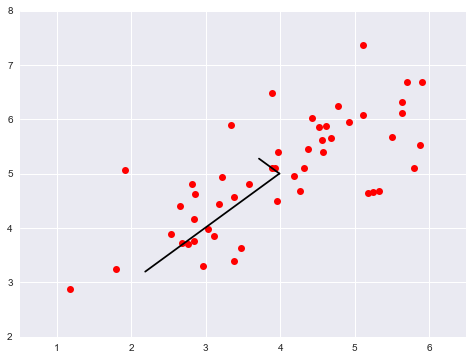

In [23]:
plt.figure()
plt.plot(X[:, 0], X[:, 1], 'ro')
plt.axis([.5, 6.5, 2, 8])
new1 = mu + 1.5 * S[0] * U[:, 0]
new2 = mu + 1.5 * S[1] * U[:, 1]
plt.plot([mu[0], new1[0]], [mu[1], new1[1]], '-k')
plt.plot([mu[0], new2[0]], [mu[1], new2[1]], '-k')
plt.show()

In [24]:
print('Top eigenvector:\n')
print('U[:, 0] =', U[:, 0])

Top eigenvector:

U[:, 0] = [-0.70710678 -0.70710678]


### Part 3: Dimension Reduction

In [25]:
def projectData(X, U, K):
    '''Computes the reduced data representation when projecting only 
       on to the top k eigenvectors'''
    return X @ U[:, :K]

def recoverData(Z, U, K):
    '''Recovers an approximation of the original data when using the projected data'''
    return Z @ U[:, :K].T

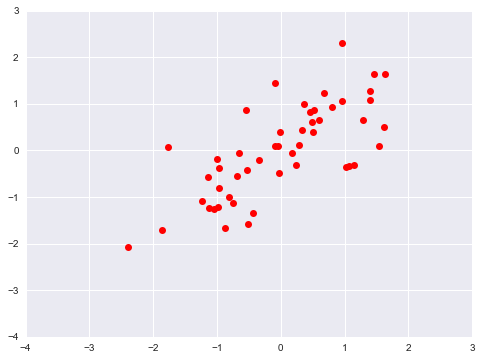

In [26]:
plt.figure()
plt.plot(X_norm[:, 0], X_norm[:, 1], 'ro')
plt.axis([-4, 3, -4, 3])
plt.show()

In [27]:
K = 1
Z = projectData(X_norm, U, K)

print('Projection of the first example: \n', Z[0])

Projection of the first example: 
 [1.48127391]


In [28]:
X_rec = recoverData(Z, U, K)

print('Approximation of the first example: \n', X_rec[0])

Approximation of the first example: 
 [-1.04741883 -1.04741883]


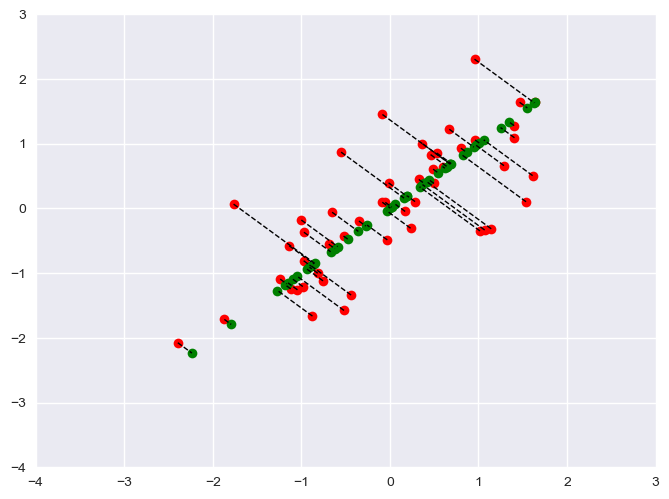

In [29]:
plt.figure(dpi=100)
plt.plot(X_norm[:, 0], X_norm[:, 1], 'ro')
plt.plot(X_rec[:, 0], X_rec[:, 1], 'go')
for i in range(len(X_norm)):
    plt.plot([X_norm[i, 0], X_rec[i, 0]],
            [X_norm[i, 1], X_rec[i, 1]], '--k', linewidth=1)
plt.axis([-4, 3, -4, 3])
plt.show()

### Part 4: Loading and Visualizing Face Data

In [30]:
def displayData(data):
    '''Display 2D data in a nice grid'''
    plt.figure(figsize=(8, 8))
    if data.shape == (len(data),):
        plt.imshow(data[n, :].reshape(32, 32).T, cmap='gray')
        plt.axis('off')
    else:
        grid_rows = int(np.floor(np.sqrt(len(data))))
        grid_cols = int(np.ceil(len(data) / grid_rows))
        n = 0
        for i in range(grid_rows):
            for j in range(grid_cols):
                ax = plt.subplot2grid((grid_rows, grid_cols), (i, j))
                try:
                    ax.imshow(data[n, :].reshape(32, 32).T, cmap='gray')
                except:
                    pass
                plt.axis('off')
                n += 1

In [31]:
data = sio.loadmat('ex7faces.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

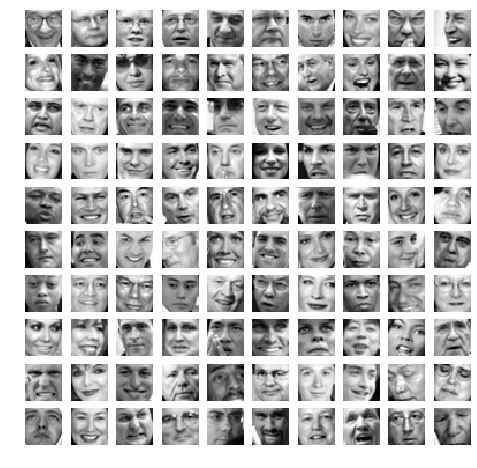

In [32]:
X = data['X']
displayData(X[:100])

### Part 5: PCA on Face Data: Eigenfaces

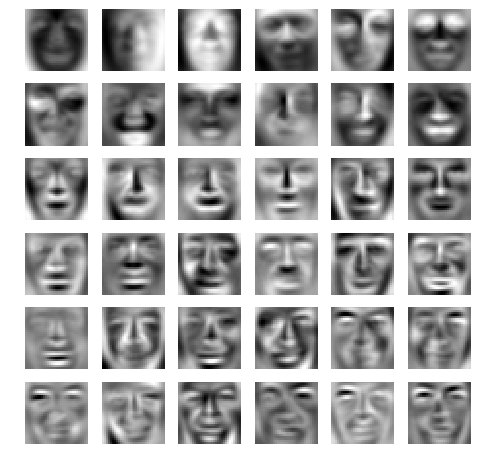

In [33]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)
displayData(U[:, :36].T)

### Part 6: Dimension Reduction for Faces

In [34]:
K = 100
Z = projectData(X_norm, U, K)
print('The projected data Z has a size of: ', Z.shape)

The projected data Z has a size of:  (5000, 100)


### Part 7: Visualization of Faces after PCA Dimension Reduction

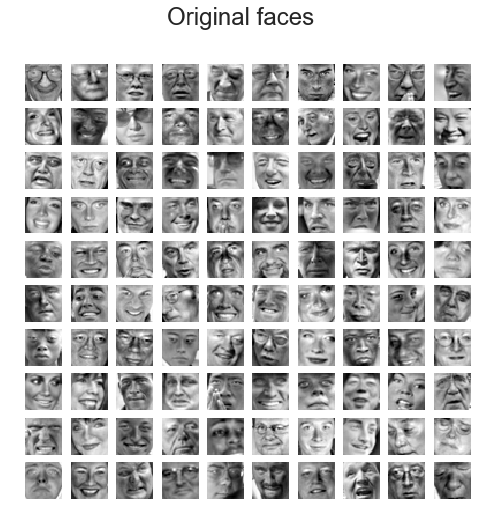

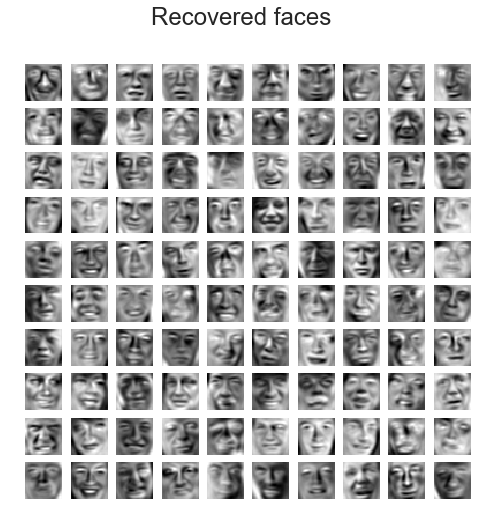

In [35]:
X_rec = recoverData(Z, U, K)

displayData(X_norm[:100])
plt.suptitle('Original faces', fontsize=24)
plt.show()

displayData(X_rec[:100])
plt.suptitle('Recovered faces', fontsize=24)
plt.show()

### Part 8a: PCA for Visualization

In [36]:
A = plt.imread('bird_small.png')
A /= 255
img_size = A.shape
X = A.reshape(img_size[0] * img_size[1], 3)
K = 16
max_iters = 10

initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)

In [37]:
sel = np.floor(np.random.rand(1000, 1) * X.shape[0]) + 1
sel = [int(i) for i in sel]
idx_sel = [idx[i] for i in sel]
palette = sns.color_palette('hls', K+1)
colors = np.array([palette[i] for i in idx_sel])

<IPython.core.display.Javascript object>


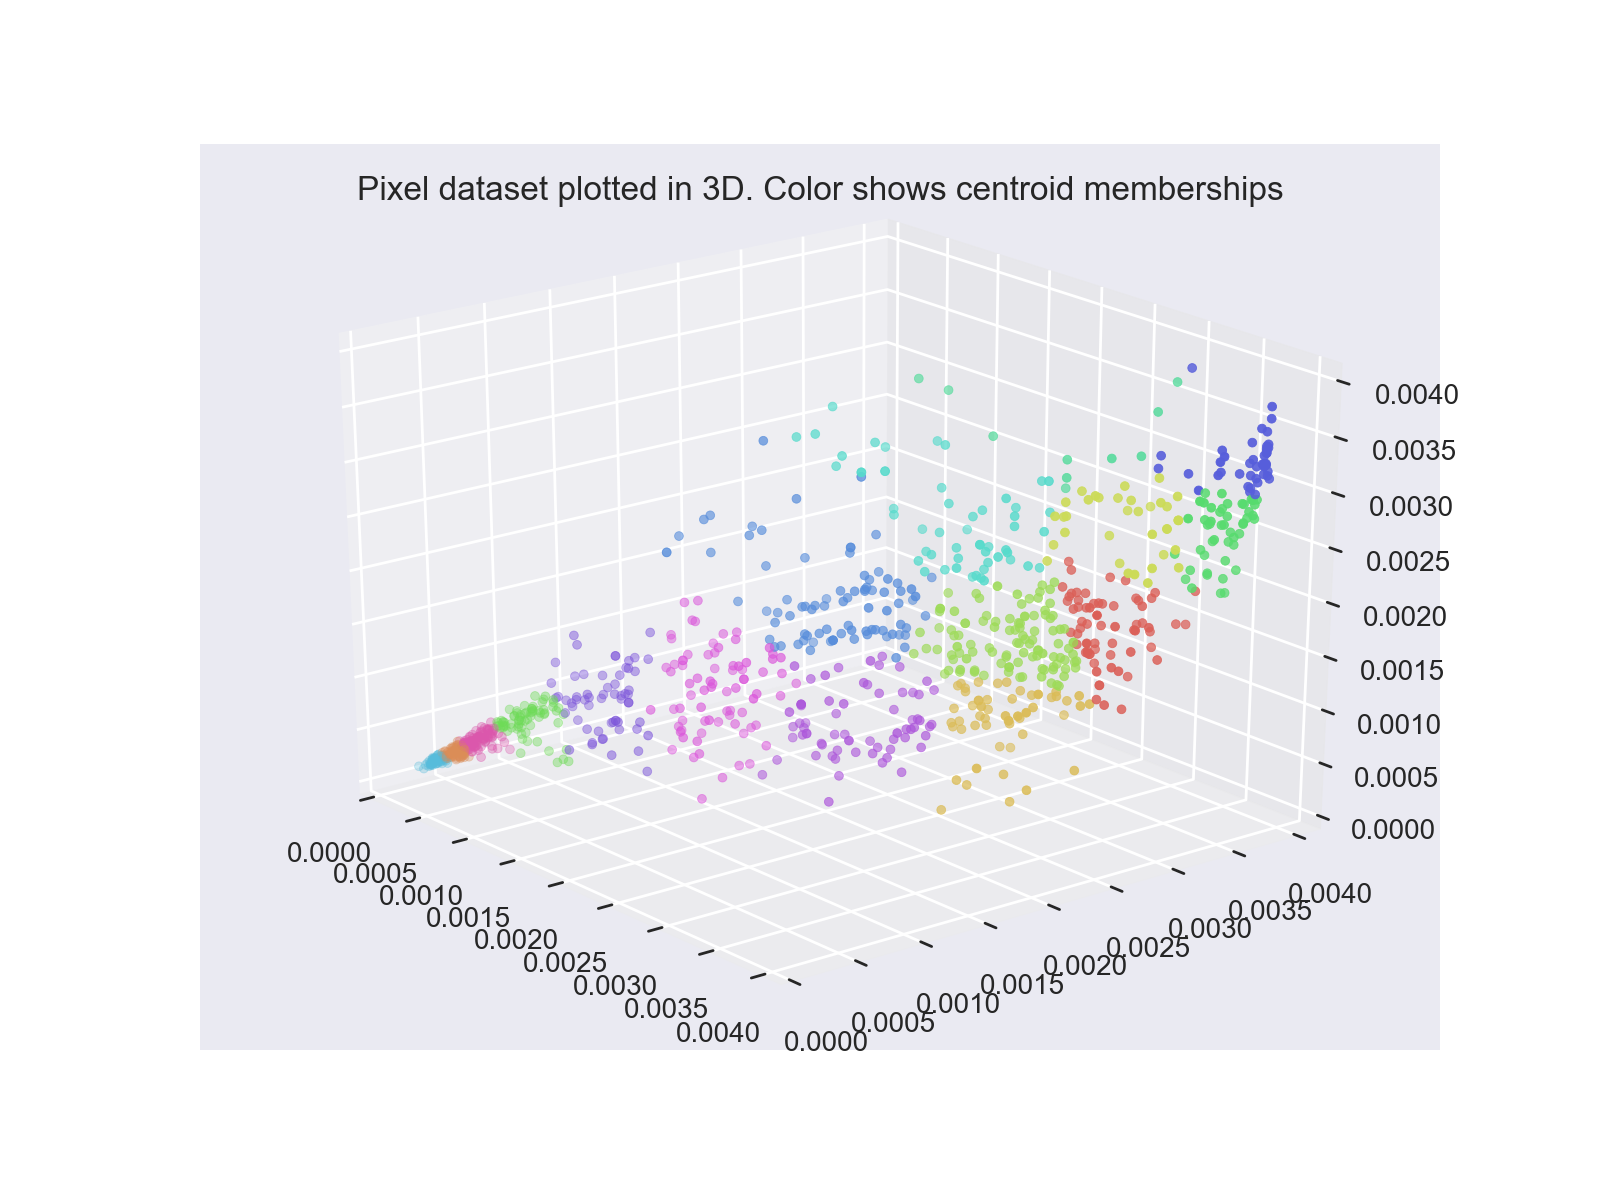

In [39]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[sel, 0], X[sel, 1], X[sel, 2], c=colors, s=10)
plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships')
plt.show()

### Part 8b: PCA for Visualization

In [40]:
def plotDataPoints(X, idx, K):
    '''Plots data points in X, coloring them so that those with the same
       index assignments in idx have the same color'''
    palette = sns.color_palette('hls', K+1)
    colors = [palette[i] for i in idx]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=15)

In [41]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)

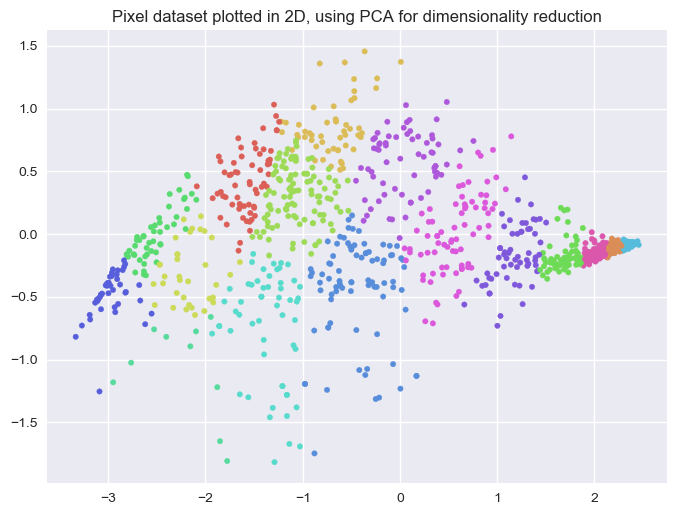

In [42]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=100)
plotDataPoints(Z[sel], idx[sel], K)
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
plt.show()